In [1]:
from APES import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import pylab as pl
from IPython import display
import skvideo.io
# Set the dimension for each block ( affect the generated image quality)
Settings.SetBlockSize(100)

# Simple Example

In [15]:
def Set_Settings():
    Settings.WorldSize=(20,20)

In [16]:
Set_Settings()

In [6]:
Settings.SetBlockSize(100)
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')
#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
red_Ag_PM = np.zeros(Settings.WorldSize)
blue_Ag_PM = np.zeros(Settings.WorldSize)
food_PM = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1 
blue_Ag_PM[:,0] =1
red_Ag_PM[3:8,3:8]=1
food_PM[3:8,3:8] = 1
#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('red_Ag_PM',red_Ag_PM)
Settings.AddProbabilityDistribution('blue_Ag_PM',blue_Ag_PM)
Settings.AddProbabilityDistribution('food_PM',food_PM)
#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs')
food = Foods('Food',PdstName='food_PM')

blue_Ag = Agent(Fname='APES/Pics/blue.jpg',
                Power=3,
                VisionAngle=180,Range=-1,
                PdstName='blue_Ag_PM',
                ActionMemory=0,
               EgoCentric=True)
red_Ag = Agent(Fname='APES/Pics/red.jpg',
               VisionAngle=180,Range=-1,
               Power=10,
               ControlRange=1,
               PdstName='red_Ag_PM')
print(blue_Ag.ID,red_Ag.ID)
game=World(RewardsScheme=[0,0,0],StepsLimit=100)
#Agents added first has priority of executing there actions first.
#game.AddAgents([ragnt])
game.AddAgents([red_Ag,blue_Ag])
#game.AddObstacles([obs])
game.AddFoods([food])

1003 1004


In [7]:
game.GenerateWorld()

In [8]:
game.Step()

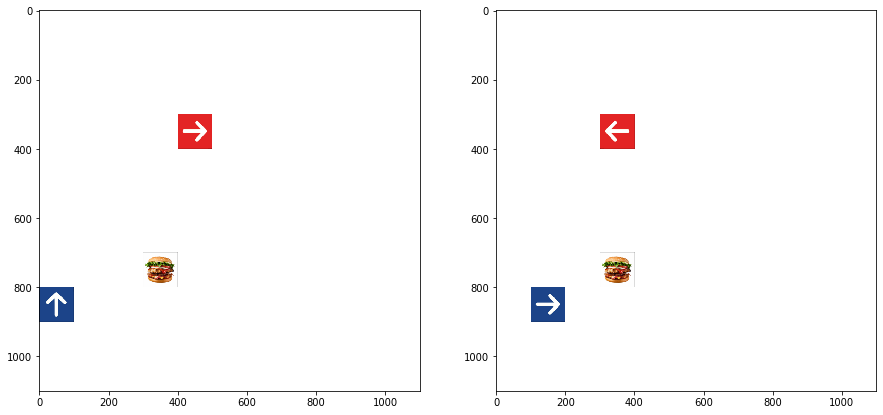

In [9]:
env_initial = game.BuildImage()
agents = [game.agents[i] for i in game.agents]
#Execute every time step
agents[0].NextAction = Settings.PossibleActions[2]
agents[1].NextAction = Settings.PossibleActions[3]

game.Step()
env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [10]:
Settings.PossibleActions[1]

[['L', 'S'], ['M', 'S']]

In [11]:
ax[1].imshow(np.rot90(np.flip(game.AgentViewPoint(1001),axis=0)))

KeyError: 1001

In [47]:
x = np.random.randint(low=0,high=10,size=(5,5))
print(x)
print(np.rot90(x))
print(np.flip(x,axis=0))

[[9 0 9 2 0]
 [9 8 3 3 2]
 [1 2 7 0 8]
 [4 5 5 8 2]
 [8 7 0 2 4]]
[[0 2 8 2 4]
 [2 3 0 8 2]
 [9 3 7 5 0]
 [0 8 2 5 7]
 [9 9 1 4 8]]
[[8 7 0 2 4]
 [4 5 5 8 2]
 [1 2 7 0 8]
 [9 8 3 3 2]
 [9 0 9 2 0]]


[['L', 'W'], ['M', 'W']]


KeyError: 1001

<Figure size 720x720 with 0 Axes>

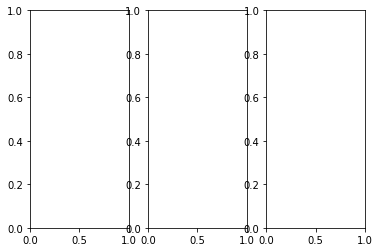

In [12]:
#agents[0].NextAction = Settings.PossibleActions[1]
ac_num = 2
print(Settings.PossibleActions[ac_num])
agents[1].NextAction = Settings.PossibleActions[ac_num]
game.Step()
plt.figure(figsize=(10,10))
fig,ax = plt.subplots(nrows=1,ncols=3)
ax[0].imshow(game.AgentViewPoint(1001))
t = time()
if agents[1].Direction=='E':
    ax[1].imshow(np.rot90(game.AgentViewPoint(1001)))
elif agents[1].Direction=='S':
    ax[1].imshow(np.flip(game.AgentViewPoint(1001),axis=0))
elif agents[1].Direction=='W':
    ax[1].imshow(np.flip(np.rot90(game.AgentViewPoint(1001)),axis=0))
else:
    ax[1].imshow(game.AgentViewPoint(1001))
print(time()-t)
ax[2].imshow(game.BuildImage())
ax
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

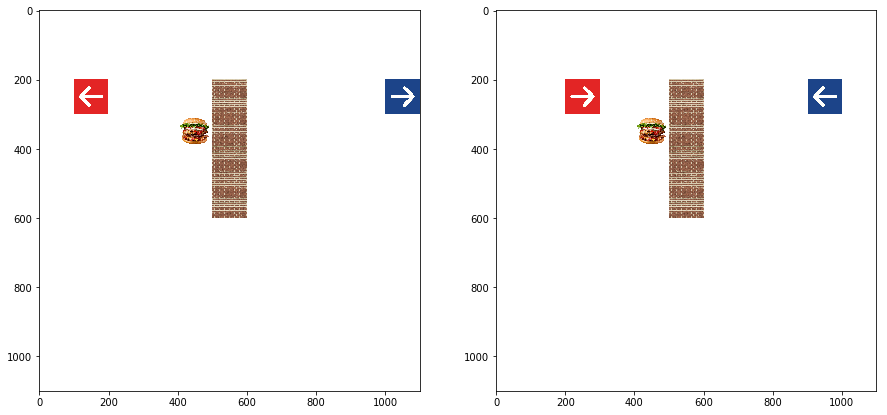

In [2]:
perf = {'sub':(2,1),'dom':(2,10),'food':(3,4),'obs':(3,5),'subdir':'W','domdir':'E','mesg':'example'}
game = CreateEnvironment(perf)

agents = [game.agents[i] for i in game.agents]

game.Step()
env_initial = game.BuildImage()

#Execute every time step
agents[0].NextAction = Settings.PossibleActions[2]
agents[1].NextAction = Settings.PossibleActions[3]

game.Step()
env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

# Complex Example.
Launching the below cell will generate a video file "output.mp4" contains the episode. The video has three perspectives next to each other in every frame:
 1. The fully observed environment.
 2. The environment as seen from the red agent point of view
 3. The environment as seen from the blue agent point of view

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


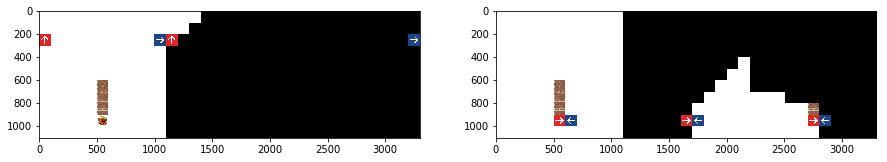

In [3]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
agnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
agnts_pdm[2,[0,10]] = 1
food_pdm[:,4:7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('agnts_pdm',agnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='agnts_pdm')
bagnt = Agent(Fname='APES/Pics/blue.jpg',PdstName='agnts_pdm')
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
game.Step()
env_initial = np.concatenate([game.BuildImage(),
                              game.AgentViewPoint(ragnt.ID),
                              game.AgentViewPoint(bagnt.ID)],axis=1)*255

writer = skvideo.io.FFmpegWriter("output.mp4")
writer.writeFrame(env_initial)

#Execute every time step
while not game.Terminated[0]:
    bagnt.DetectAndAstar()
    ragnt.DetectAndAstar()
    game.Step()
    env_1step = np.concatenate([game.BuildImage(),
                                game.AgentViewPoint(ragnt.ID),
                                game.AgentViewPoint(bagnt.ID)],axis=1)*255
    writer.writeFrame(env_1step)
writer.close()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial/255)
ax[1].imshow(env_1step/255)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()